In [1]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [8]:
bikes.head()

datetime  season  holiday  ...  casual  registered  count
0  2011-01-01 00:00:00       1        0  ...       3          13     16
1  2011-01-01 01:00:00       1        0  ...       8          32     40
2  2011-01-01 02:00:00       1        0  ...       5          27     32
3  2011-01-01 03:00:00       1        0  ...       3          10     13
4  2011-01-01 04:00:00       1        0  ...       0           1      1

[5 rows x 12 columns]

In [9]:
bikes.describe()

season       holiday  ...    registered         count
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...    155.552177    191.574132
std        1.116174      0.166599  ...    151.039033    181.144454
min        1.000000      0.000000  ...      0.000000      1.000000
25%        2.000000      0.000000  ...     36.000000     42.000000
50%        3.000000      0.000000  ...    118.000000    145.000000
75%        4.000000      0.000000  ...    222.000000    284.000000
max        4.000000      1.000000  ...    886.000000    977.000000

[8 rows x 11 columns]

In [10]:
# feature engineering
# create daily version of data set
# convert the datetime column into a datetime data type
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
# with the pd.to_datetime() function we can make the change
bikes['datetime'] = pd.to_datetime(bikes['datetime'])



In [19]:
# set the datetime as an index
bikes_daily = bikes.set_index('datetime')



In [20]:
bikes_daily

season  holiday  workingday  ...  casual  registered  count
datetime                                          ...                           
2011-01-01 00:00:00       1        0           0  ...       3          13     16
2011-01-01 01:00:00       1        0           0  ...       8          32     40
2011-01-01 02:00:00       1        0           0  ...       5          27     32
2011-01-01 03:00:00       1        0           0  ...       3          10     13
2011-01-01 04:00:00       1        0           0  ...       0           1      1
...                     ...      ...         ...  ...     ...         ...    ...
2012-12-19 19:00:00       4        0           1  ...       7         329    336
2012-12-19 20:00:00       4        0           1  ...      10         231    241
2012-12-19 21:00:00       4        0           1  ...       4         164    168
2012-12-19 22:00:00       4        0           1  ...      12         117    129
2012-12-19 23:00:00       4        0           1  ...       4          84     88

[10886 rows x 11 columns]

In [16]:
bikes_daily = bikes_daily.resample('D')

AttributeError: 'DatetimeIndexResampler' object has no attribute 'resample'

In [18]:
bikes_daily = bikes_daily.resample('D').aggregate({'season':'max', 'holiday':'max','workingday':'max', 'weather':'max',\
                                                   'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean',\
                                                    'casual':'sum', 'registered':'sum', 'count':'sum'})

In [22]:
# isolate the hour of the day to assess time of day

bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

In [23]:
bikes.head()

datetime  season  holiday  ...  registered  count  hour
0 2011-01-01 00:00:00       1        0  ...          13     16     0
1 2011-01-01 01:00:00       1        0  ...          32     40     1
2 2011-01-01 02:00:00       1        0  ...          27     32     2
3 2011-01-01 03:00:00       1        0  ...          10     13     3
4 2011-01-01 04:00:00       1        0  ...           1      1     4

[5 rows x 13 columns]

In [32]:
def time_of_day(x):
    if x >= 6 and x <= 9:
        return 'morning_commute'
    elif x> 9 and x<=15:
        return 'midday'
    elif x>15 and x<=19:
        return 'evening_commute'
    else:
        return 'afterhours'

In [33]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

In [34]:
# return the weekday > day 0 = Monday
bikes['weekday'] = bikes['datetime'].apply(lambda x: x.weekday())

In [35]:
bikes.head()

datetime  season  holiday  ...  hour  time_of_day  weekday
0 2011-01-01 00:00:00       1        0  ...     0   afterhours        5
1 2011-01-01 01:00:00       1        0  ...     1   afterhours        5
2 2011-01-01 02:00:00       1        0  ...     2   afterhours        5
3 2011-01-01 03:00:00       1        0  ...     3   afterhours        5
4 2011-01-01 04:00:00       1        0  ...     4   afterhours        5

[5 rows x 15 columns]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1341687593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette = 'tab10')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1341687593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2,palette = 'tab10')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1341687593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='coun

Text(0, 0.5, 'count')

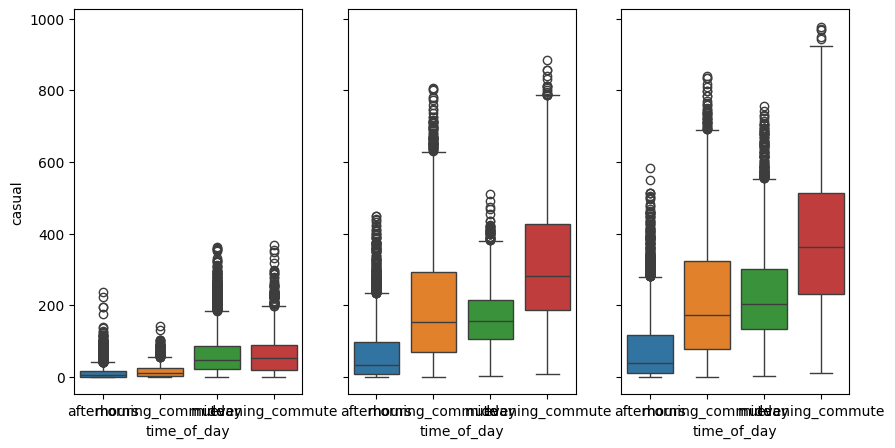

In [40]:
# evaluate weekday vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette = 'tab10')
sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2,palette = 'tab10')
sns.boxplot(x='time_of_day', y='count', data=bikes, ax=ax3,palette = 'tab10')
ax2.set_ylabel('registered')
ax3.set_ylabel('count')

<Axes: xlabel='weekday', ylabel='count'>

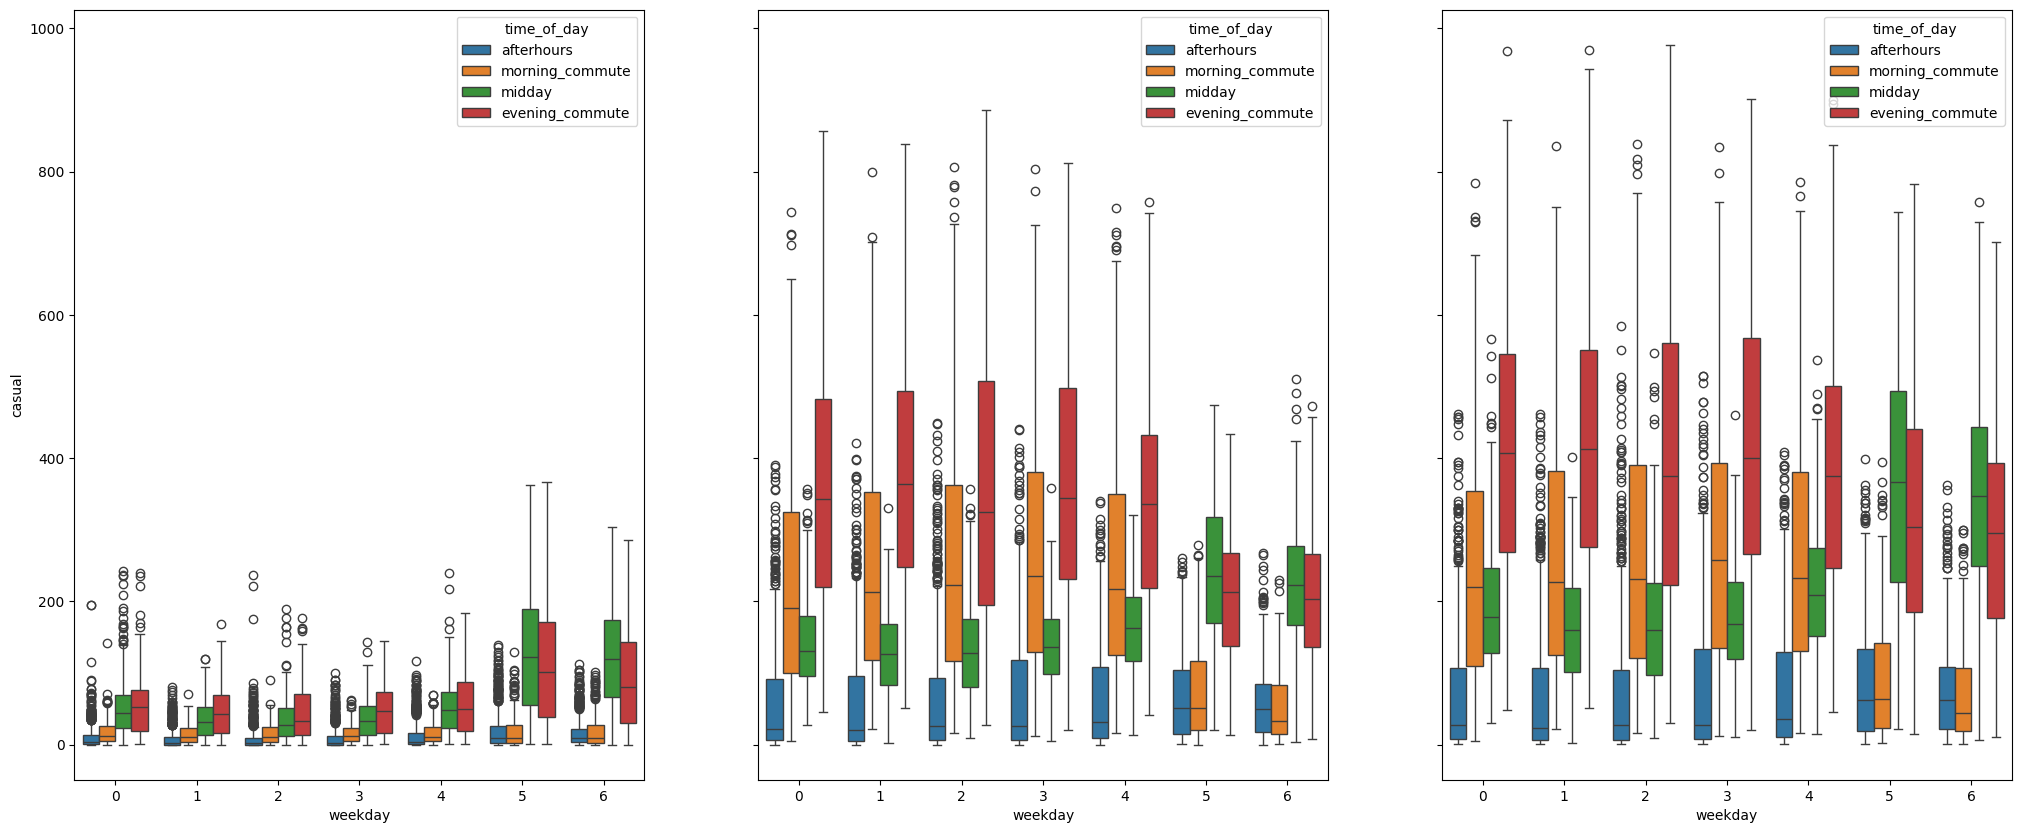

In [39]:
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.boxplot(x='weekday', y='casual', hue='time_of_day',data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='weekday', y='registered', hue='time_of_day',data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='weekday', y='count', hue='time_of_day',data=bikes, ax=ax3, palette='tab10')

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1690938000.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1690938000.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_10487/1690938000.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3, palette='tab10')


<Axes: xlabel='temp', ylabel='count'>

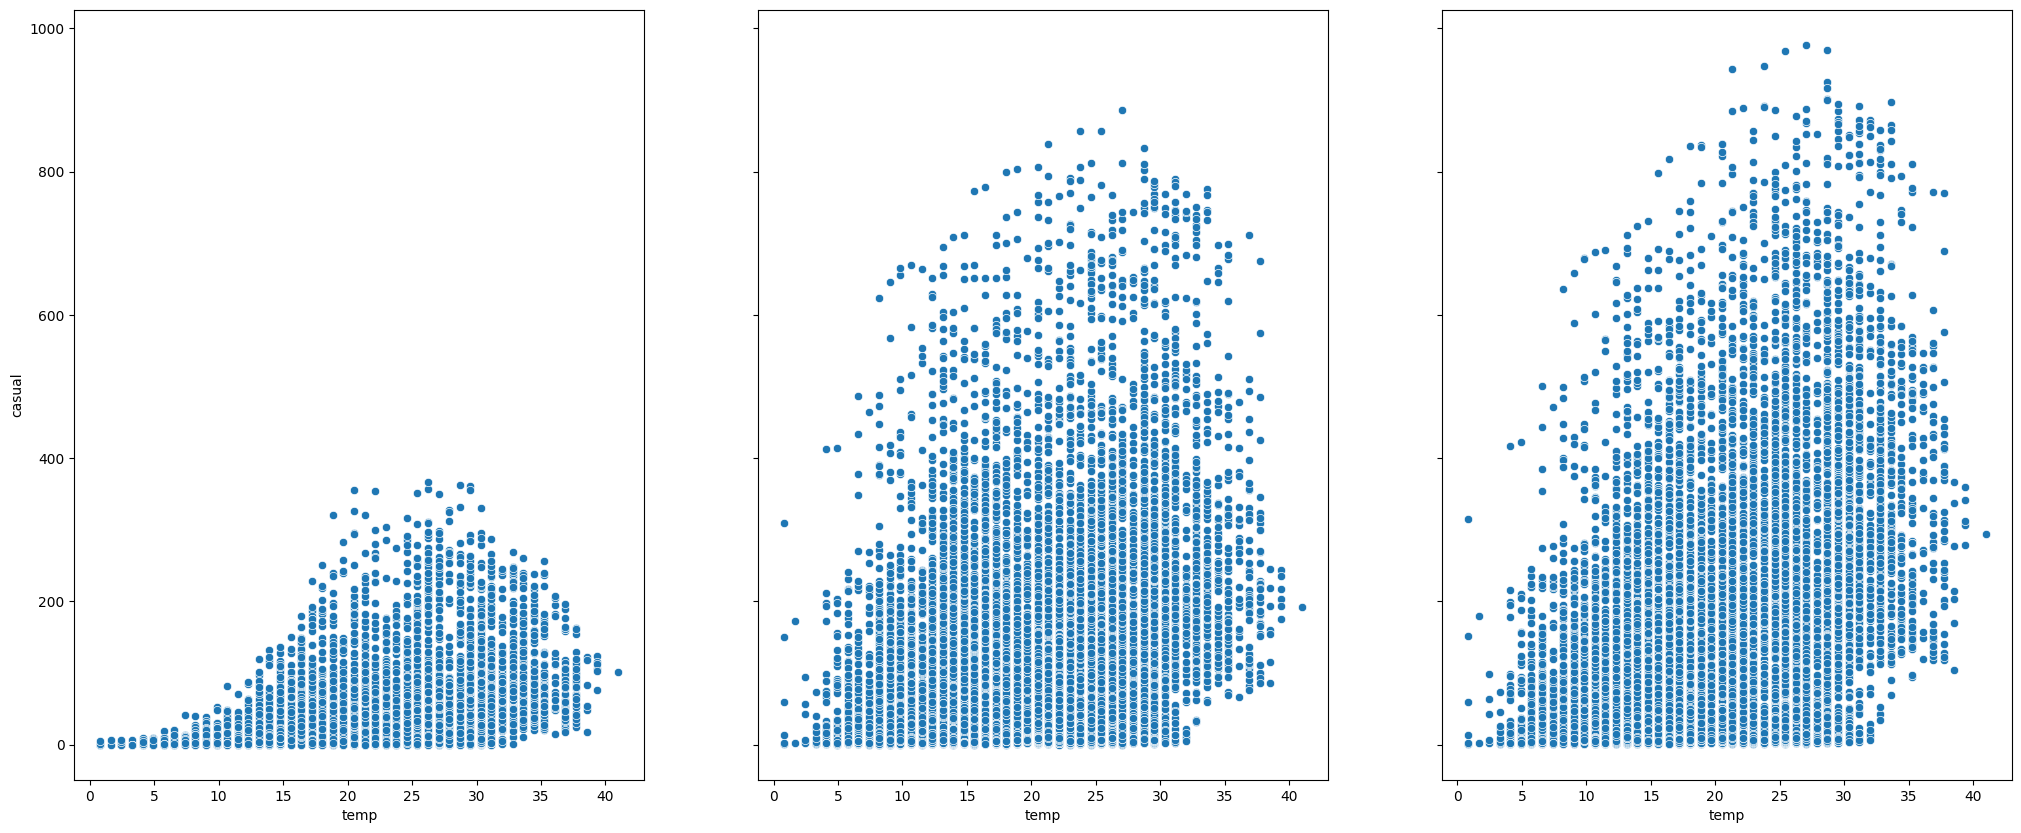

In [42]:

# lets look at Temperature vs. Rental Counts
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3, palette='tab10')

<Axes: xlabel='temp', ylabel='count'>

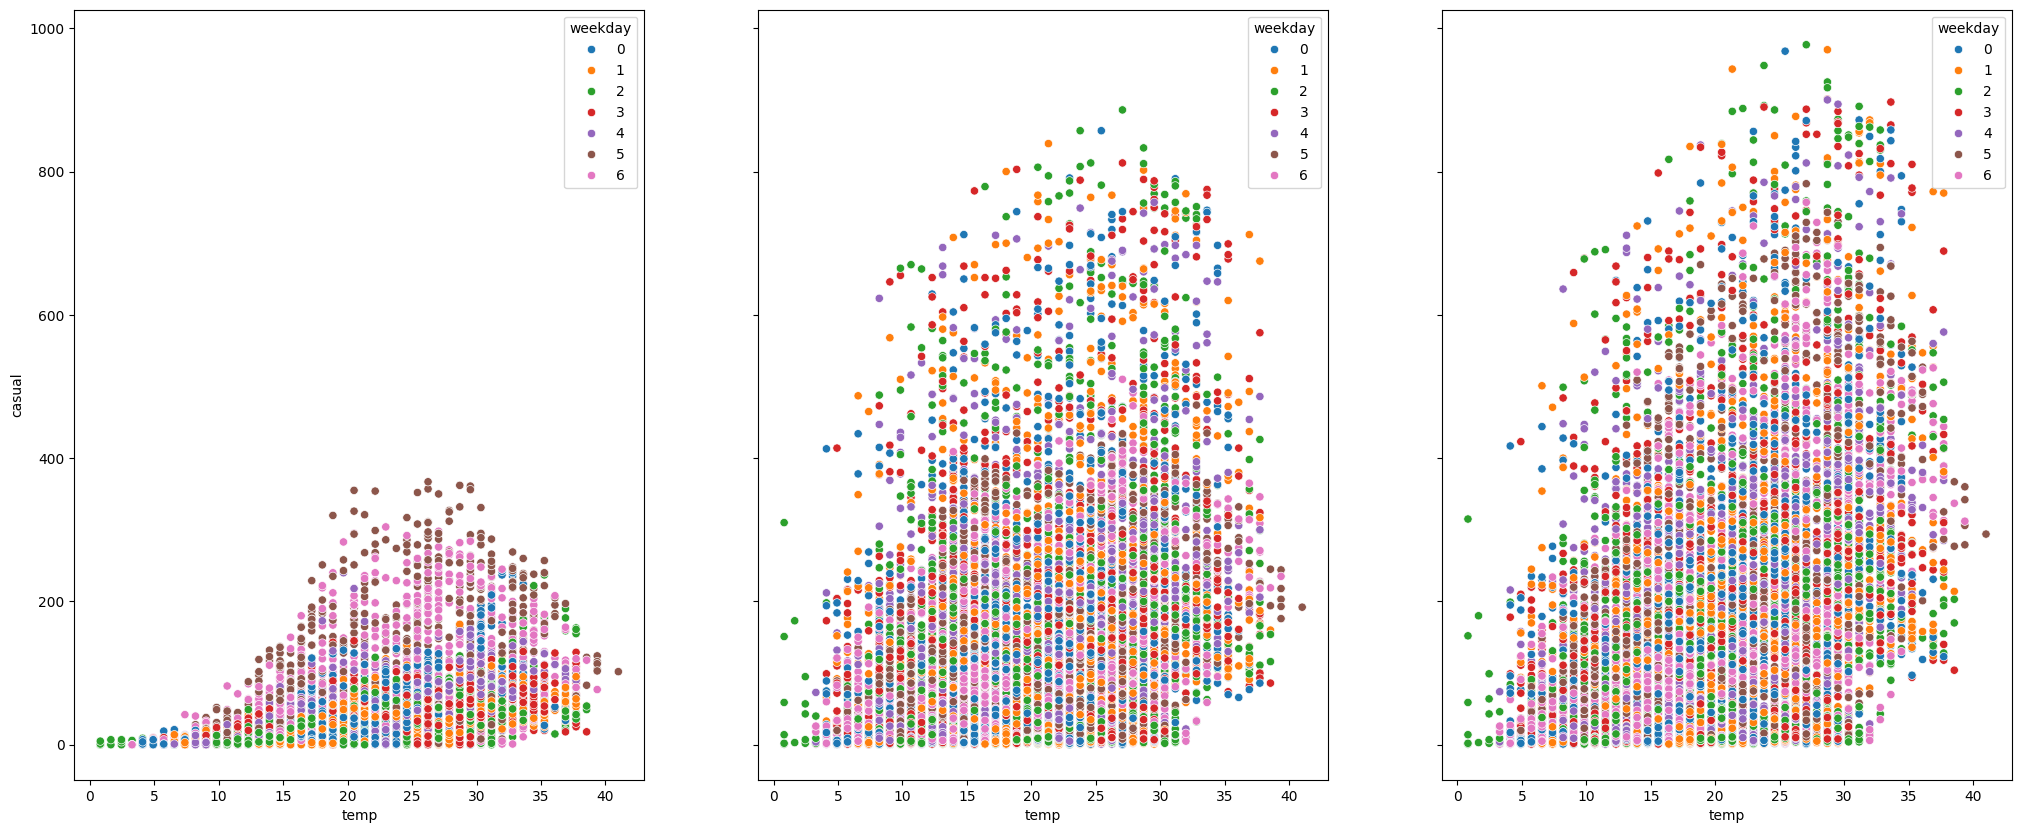

In [43]:
# lets look at Temperature vs. Rental Counts
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.scatterplot(x='temp', y='casual', hue='weekday',data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', hue='weekday', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', hue='weekday', data=bikes, ax=ax3, palette='tab10')

In [46]:
bikes[bikes['time_of_day'] == 'evening_commute'] ['casual'].describe()

count    1824.000000
mean       65.248904
std        57.820172
min         0.000000
25%        19.000000
50%        54.000000
75%        90.250000
max       367.000000
Name: casual, dtype: float64

In [47]:
model_data = pd.get_dummies(data = bikes[['temp','weekday','time_of_day']], columns=['weekday','time_of_day']).head()

In [48]:
model_data = pd.get_dummies(data = bikes[['casual','temp','weekday','time_of_day']], columns=['weekday','time_of_day']).head()

In [49]:
model_data.columns

Index(['casual', 'temp', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'time_of_day_afterhours',
       'time_of_day_evening_commute', 'time_of_day_midday',
       'time_of_day_morning_commute'],
      dtype='object')

In [50]:
model_data = pd.get_dummies(data = bikes[['casual','temp','weekday','time_of_day']], columns=['weekday','time_of_day'], dtype=int)

In [51]:
model = ols('casual ~ temp+ weekday_0+ weekday_1+ weekday_2+ weekday_3+ \
       weekday_4+ weekday_5+ weekday_6+ time_of_day_afterhours+ \
       time_of_day_evening_commute+ time_of_day_midday+ \
       time_of_day_morning_commute', data = model_data).fit()

In [53]:
model = ols("casual ~ temp +  weekday_1 + weekday_2 + weekday_3 + \
       weekday_4 + weekday_5 + weekday_6  + \
            time_of_day_evening_commute + time_of_day_midday + time_of_day_morning_commute", data=model_data).fit()

In [54]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1134.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:05:39   Log-Likelihood:                -54136.
No. Observations:               10886   AIC:                         1.083e+05
Df Residuals:                   10875   BIC:                         1.084e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [55]:
model_data.head()

casual  temp  ...  time_of_day_midday  time_of_day_morning_commute
0       3  9.84  ...                   0                            0
1       8  9.02  ...                   0                            0
2       5  9.02  ...                   0                            0
3       3  9.84  ...                   0                            0
4       0  9.84  ...                   0                            0

[5 rows x 13 columns]

In [56]:
predictions = model.predict(model_data.iloc[:,1:])

In [57]:
predictions

0        19.355088
1        17.317027
2        17.317027
3        19.355088
4        19.355088
           ...    
10881    34.813821
10882   -11.262562
10883   -13.300624
10884   -13.300624
10885   -15.338685
Length: 10886, dtype: float64

In [58]:
final_data = pd.concat([model_data, predictions], axis=1)

In [59]:
final_data.rename(columns={0:'predictions'}, inplace=True)

In [60]:
final_data['residuals'] = final_data['predictions'] - final_data['casual']

In [61]:
predictions = model.predict(model_data.iloc[:,1:])

In [62]:
Del predict

SyntaxError: invalid syntax (108782820.py, line 1)

<Axes: xlabel='predictions', ylabel='residuals'>

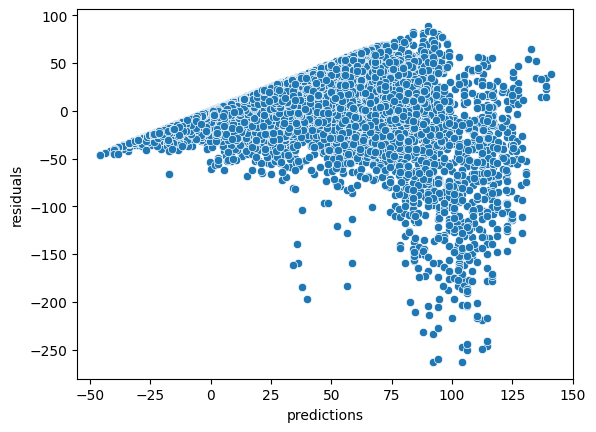

In [63]:
sns.scatterplot(x='predictions', y='residuals', data=final_data)

<Axes: xlabel='residuals', ylabel='Count'>

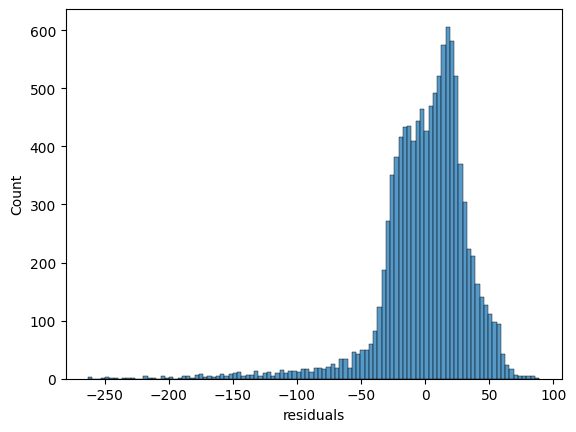

In [64]:
# check for normal distribution of residuals
sns.histplot(final_data['residuals'])

In [65]:
import statsmodels.api as sm

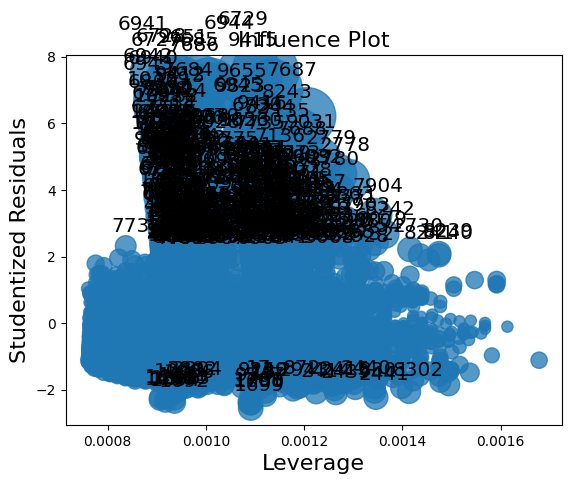

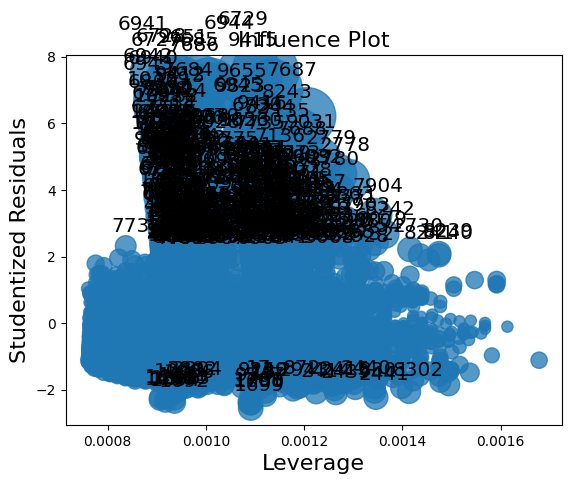

In [66]:
sm.graphics.influence_plot(model, criterion = 'cooks')

In [67]:
np.mean(np.sqrt(final_data['residuals'] **2))

24.37005700126346

In [68]:
np.mean(final_data.casual)

36.02195480433584

In [69]:
24/36

0.6666666666666666